# TD2: Deep learning

In this TD, you must modify this notebook to answer the questions. To do this,

1. Fork this repository
2. Clone your forked repository on your local computer
3. Answer the questions
4. Commit and push regularly

The last commit is due on Sunday, December 1, 11:59 PM. Later commits will not be taken into account.

Install and test PyTorch from  https://pytorch.org/get-started/locally.

In [ ]:
%pip install torch torchvision


To test run the following code

In [26]:
import torch

N, D = 14, 10
x = torch.randn(N, D).type(torch.FloatTensor)
print(x)

from torchvision import models

alexnet = models.alexnet()
print(alexnet)

tensor([[-1.6900,  0.1515, -0.1568, -2.0969, -0.5278,  0.6218,  0.3922, -0.6057,
         -0.7291,  0.2046],
        [ 1.4776, -1.7798, -0.5365,  0.9682,  0.2097, -0.0996, -0.2982,  0.7891,
         -0.3924,  0.0546],
        [ 1.1218, -0.2286, -1.1962,  0.1250, -1.5484, -0.5640,  0.0308,  0.2313,
         -0.0773,  0.5532],
        [-0.1000,  0.3633,  1.1688,  0.7930, -0.0303, -0.6985,  0.7679,  0.5111,
         -2.7290, -0.7675],
        [-0.7067,  0.0325,  0.7177, -0.2783,  1.4820,  0.6153, -2.3233,  0.6494,
          1.4352,  1.2583],
        [ 1.2969,  0.5632, -0.7471, -0.0228,  0.1049, -0.3550,  1.6854,  2.0872,
         -1.3583,  0.7122],
        [ 0.6103, -0.7994, -0.9384, -0.4365, -0.1876, -1.9450, -0.4624,  1.2562,
          0.9817, -0.0628],
        [ 0.9058,  0.9132, -0.8898,  0.0076, -0.0641, -1.3324, -1.1656,  0.5032,
         -0.5097,  0.9018],
        [-0.8475, -0.0260,  2.3063,  0.3875,  1.0270,  0.0559, -0.0036,  0.0080,
         -2.3212, -0.4067],
        [-1.0759, -

## Exercise 1: CNN on CIFAR10

The goal is to apply a Convolutional Neural Net (CNN) model on the CIFAR10 image dataset and test the accuracy of the model on the basis of image classification. Compare the Accuracy VS the neural network implemented during TD1.

Have a look at the following documentation to be familiar with PyTorch.

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

You can test if GPU is available on your machine and thus train on it to speed up the process

In [2]:
import torch

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("CUDA is not available.  Training on CPU ...")
else:
    print("CUDA is available!  Training on GPU ...")

CUDA is not available.  Training on CPU ...


Next we load the CIFAR10 dataset

In [6]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# choose the training and test datasets
train_data = datasets.CIFAR10("data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10("data", train=False, download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
valid_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers
)

# specify the image classes
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

100%|██████████| 170498071/170498071 [00:04<00:00, 42416276.91it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


CNN definition (this one is an example)

In [7]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Loss function and training using SGD (Stochastic Gradient Descent) optimizer

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_min = np.Inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss

KeyboardInterrupt: ignored

Does overfit occur? If so, do an early stopping. We did an early stopping at the 15th Epoch because Validation Loss started increasing.

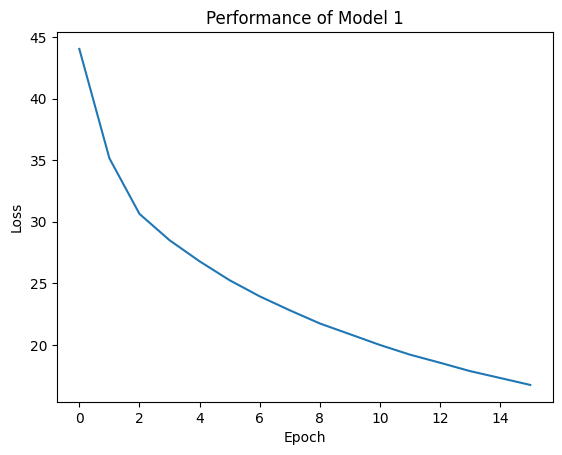

In [12]:
import matplotlib.pyplot as plt
n_epochs_stop = 16 # Here we stop the execution before the overfit
plt.plot(range(n_epochs_stop), train_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 1")
plt.show()

Now loading the model with the lowest validation loss value


In [13]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 21.102371

Test Accuracy of airplane: 73% (730/1000)
Test Accuracy of automobile: 83% (839/1000)
Test Accuracy of  bird: 55% (558/1000)
Test Accuracy of   cat: 40% (406/1000)
Test Accuracy of  deer: 41% (415/1000)
Test Accuracy of   dog: 57% (573/1000)
Test Accuracy of  frog: 73% (730/1000)
Test Accuracy of horse: 70% (707/1000)
Test Accuracy of  ship: 66% (663/1000)
Test Accuracy of truck: 72% (723/1000)

Test Accuracy (Overall): 63% (6344/10000)


Build a new network with the following structure.

- It has 3 convolutional layers of kernel size 3 and padding of 1.
- The first convolutional layer must output 16 channels, the second 32 and the third 64.
- At each convolutional layer output, we apply a ReLU activation then a MaxPool with kernel size of 2.
- Then, three fully connected layers, the first two being followed by a ReLU activation and a dropout whose value you will suggest.
- The first fully connected layer will have an output size of 512.
- The second fully connected layer will have an output size of 64.

Compare the results obtained with this new network to those obtained previously.

In [11]:
#NEW NETWORK

import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture


class Net_new(nn.Module):
    def __init__(self):
        super(Net_new, self).__init__()

        #Convolution layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels = 16, kernel_size=3, padding=1)


        #Convolution layer 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels = 32, kernel_size=3, padding=1)


        #Convolution layer 3
        self.conv3 = nn.Conv2d(in_channels=32, out_channels = 64, kernel_size=3, padding=1)

        #Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        #Fully connected Layers
        self.fc1 = nn.Linear(in_features=64 * 4 * 4, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=64)
        self.fc3 = nn.Linear(64, 10)

        self.dropout = nn.Dropout(p = 0.5)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1, 64 * 4 * 4) #linearisation of the tensor
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x) # output layer
        return x


# create a complete CNN
model= Net_new()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net_new(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [12]:
#LOSS FUNCTION AND TRAINING OF NEW MODEL

import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_min = np.Inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 45.437011 	Validation Loss: 42.235335
Validation loss decreased (inf --> 42.235335).  Saving model ...
Epoch: 1 	Training Loss: 40.342287 	Validation Loss: 37.157713
Validation loss decreased (42.235335 --> 37.157713).  Saving model ...
Epoch: 2 	Training Loss: 36.543231 	Validation Loss: 34.165958
Validation loss decreased (37.157713 --> 34.165958).  Saving model ...
Epoch: 3 	Training Loss: 33.370877 	Validation Loss: 30.313300
Validation loss decreased (34.165958 --> 30.313300).  Saving model ...
Epoch: 4 	Training Loss: 31.175180 	Validation Loss: 28.547296
Validation loss decreased (30.313300 --> 28.547296).  Saving model ...
Epoch: 5 	Training Loss: 29.419332 	Validation Loss: 27.043618
Validation loss decreased (28.547296 --> 27.043618).  Saving model ...
Epoch: 6 	Training Loss: 27.940666 	Validation Loss: 25.369496
Validation loss decreased (27.043618 --> 25.369496).  Saving model ...
Epoch: 7 	Training Loss: 26.553561 	Validation Loss: 24.676774
Valid

KeyboardInterrupt: ignored

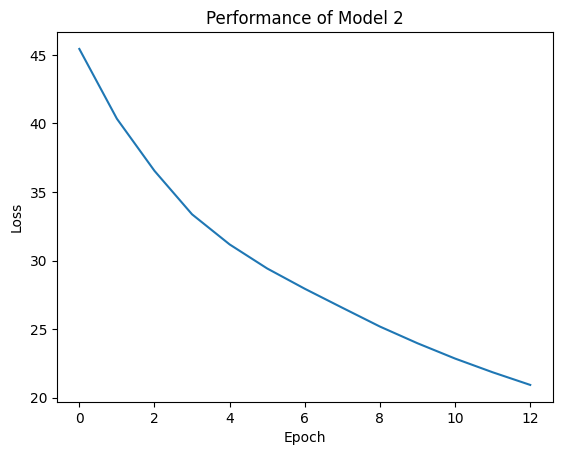

In [14]:
import matplotlib.pyplot as plt
n_epochs_stop = 13
plt.plot(range(n_epochs_stop), train_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 2")
plt.show()

In [25]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 19.730781

Test Accuracy of airplane: 73% (734/1000)
Test Accuracy of automobile: 80% (808/1000)
Test Accuracy of  bird: 43% (433/1000)
Test Accuracy of   cat: 40% (407/1000)
Test Accuracy of  deer: 58% (588/1000)
Test Accuracy of   dog: 50% (509/1000)
Test Accuracy of  frog: 76% (765/1000)
Test Accuracy of horse: 76% (761/1000)
Test Accuracy of  ship: 79% (798/1000)
Test Accuracy of truck: 73% (736/1000)

Test Accuracy (Overall): 65% (6539/10000)


The accuracy is slightly higher than the first model

## Exercise 2: Quantization: try to compress the CNN to save space

Quantization doc is available from https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic
        
The Exercise is to quantize post training the above CNN model. Compare the size reduction and the impact on the classification accuracy


The size of the model is simply the size of the file.

In [16]:
import os


def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size = os.path.getsize("temp.p")
    print("model: ", label, " \t", "Size (KB):", size / 1e3)
    os.remove("temp.p")
    return size


print_size_of_model(model, "fp32")

model:  fp32  	 Size (KB): 2330.946


2330946

Post training quantization example

In [17]:
import torch.quantization


quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
print_size_of_model(quantized_model, "int8")

model:  int8  	 Size (KB): 659.806


659806

For each class, compare the classification test accuracy of the initial model and the quantized model. Also give the overall test accuracy for both models.

In [18]:
# track test loss for un-quantized model
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

quantized_model.eval()

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
   # if train_on_gpu:
        #data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = quantized_model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 19.733812

Test Accuracy of airplane: 73% (730/1000)
Test Accuracy of automobile: 80% (808/1000)
Test Accuracy of  bird: 43% (432/1000)
Test Accuracy of   cat: 40% (408/1000)
Test Accuracy of  deer: 59% (591/1000)
Test Accuracy of   dog: 50% (506/1000)
Test Accuracy of  frog: 76% (765/1000)
Test Accuracy of horse: 76% (761/1000)
Test Accuracy of  ship: 79% (796/1000)
Test Accuracy of truck: 73% (737/1000)

Test Accuracy (Overall): 65% (6534/10000)


In [19]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 19.730781

Test Accuracy of airplane: 73% (734/1000)
Test Accuracy of automobile: 80% (808/1000)
Test Accuracy of  bird: 43% (433/1000)
Test Accuracy of   cat: 40% (407/1000)
Test Accuracy of  deer: 58% (588/1000)
Test Accuracy of   dog: 50% (509/1000)
Test Accuracy of  frog: 76% (765/1000)
Test Accuracy of horse: 76% (761/1000)
Test Accuracy of  ship: 79% (798/1000)
Test Accuracy of truck: 73% (736/1000)

Test Accuracy (Overall): 65% (6539/10000)


The results show that the quantized and the initial model have the same Accuracy, globally and for each class. As the quantized model is way easier to execute, we understand the added value of this method.

Try training aware quantization to mitigate the impact on the accuracy (doc available here https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic)

## Exercise 3: working with pre-trained models.

PyTorch offers several pre-trained models https://pytorch.org/vision/0.8/models.html        
We will use ResNet50 trained on ImageNet dataset (https://www.image-net.org/index.php). Use the following code with the files `imagenet-simple-labels.json` that contains the imagenet labels and the image dog.png that we will use as test.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 110MB/s]


Predicted class is: Golden Retriever


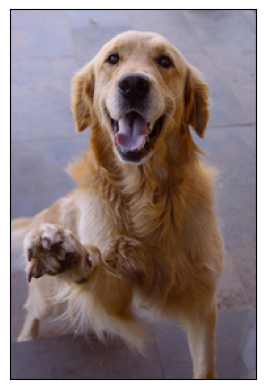

In [27]:
import json
from PIL import Image

# Choose an image to pass through the model
test_image = "dog.png"

# Configure matplotlib for pretty inline plots
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
# Load the image

image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
# image = data_transform(image).unsqueeze(0).cuda()
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.resnet50(pretrained=True)
# Send the model to the GPU
# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval()

# Get the 1000-dimensional model output
out = model(image)
# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

Experiments:

Study the code and the results obtained. Possibly add other images downloaded from the internet.

What is the size of the model? Quantize it and then check if the model is still able to correctly classify the other images.

Experiment with other pre-trained CNN models.

    


This code loads an image, resizes and normalizes it so it can be tested on a pre-trained ResNet50 model. We see that this model succeded with the dog picture, let's try with other pictures.

In [28]:
def testing_image(test_image, model):
    # Open and display the specified image file
    image = Image.open(test_image)
    plt.imshow(image), plt.xticks([]), plt.yticks([])

    # Process the image (resize, convert to tensor, normalize) and add a batch dimension
    image = data_transform(image).unsqueeze(0)  # Transform and add batch dimension: shape [1, 224, 224, 3]

    # Switch the model to evaluation mode to disable training-specific operations like dropout
    model.eval()

    # Forward pass through the model to get predictions
    out = model(image)

    # Determine the class with the highest prediction score
    print("Predicted class is: {}".format(labels[out.argmax()]))

cheetah.jpg
Predicted class is: cheetah
parrot.jpeg
Predicted class is: macaw
zebra.jpeg
Predicted class is: zebra
tiger.jpeg
Predicted class is: tiger
monkey.jpg
Predicted class is: proboscis monkey
panther.jpg
Predicted class is: cougar


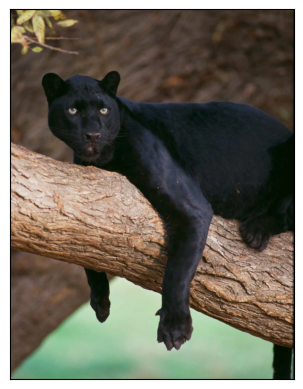

In [36]:
#test a batch of images from the internet
batch_test = ["cheetah.jpg","parrot.jpeg", "zebra.jpeg", "tiger.jpeg", "monkey.jpg", "panther.jpg"]
for test_image in batch_test:
    print(test_image)
    testing_image(test_image, model)

On the 6 images, only the last one is inexact : a cougar is identified instead of a black panther.

Lets now size the model and quantize it.

In [37]:
print_size_of_model(model, "fp32")

model:  fp32  	 Size (KB): 102523.238


102523238

In [38]:
import torch.quantization


quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
print_size_of_model(quantized_model, "int8")

model:  int8  	 Size (KB): 96379.996


96379996

The model weights 102.5 MB
We will now test it after quantisation

cheetah.jpg
Predicted class is: cheetah
parrot.jpeg
Predicted class is: macaw
zebra.jpeg
Predicted class is: zebra
tiger.jpeg
Predicted class is: tiger
monkey.jpg
Predicted class is: proboscis monkey
panther.jpg
Predicted class is: cougar


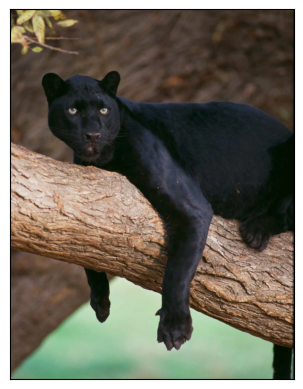

In [39]:
for test_image in batch_test:
    print(test_image)
    testing_image(test_image, quantized_model)

We have the same result as the un-quantized model. We then try another CNN model :

In [40]:
def testing_image_other_model(test_image, model):
    # Open and display the specified image file
    image = Image.open(test_image)
    plt.imshow(image), plt.xticks([]), plt.yticks([])

    # Process the image (resize, convert to tensor, normalize) and add a batch dimension
    image = data_transform(image).unsqueeze(0)  # Transform and add batch dimension: shape [1, 224, 224, 3]

    model = models.vgg16(pretrained=True) #load the new model

    # Switch the model to evaluation mode to disable training-specific operations like dropout
    model.eval()

    # Forward pass through the model to get predictions
    out = model(image)

    # Determine the class with the highest prediction score
    print("Predicted class is: {}".format(labels[out.argmax()]))

cheetah.jpg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 72.9MB/s]


Predicted class is: cheetah
parrot.jpeg
Predicted class is: macaw
zebra.jpeg
Predicted class is: zebra
tiger.jpeg
Predicted class is: tiger
monkey.jpg
Predicted class is: proboscis monkey
panther.jpg
Predicted class is: American black bear


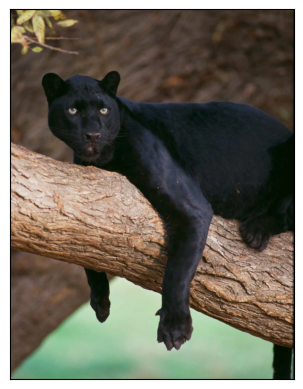

In [41]:
for test_image in batch_test:
    print(test_image)
    testing_image_other_model(test_image, model)

The panther is now identified as a black bear, but the other images are correctly guessed.

## Exercise 4: Transfer Learning
    
    
For this work, we will use a pre-trained model (ResNet18) as a descriptor extractor and will refine the classification by training only the last fully connected layer of the network. Thus, the output layer of the pre-trained network will be replaced by a layer adapted to the new classes to be recognized which will be in our case ants and bees.
Download and unzip in your working directory the dataset available at the address :
    
https://download.pytorch.org/tutorial/hymenoptera_data.zip
    
Execute the following code in order to display some images of the dataset.

Mounted at /content/drive


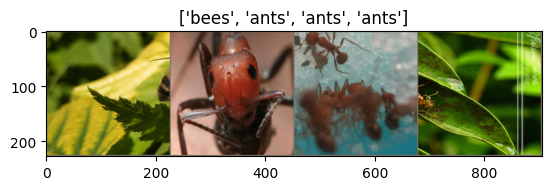

In [44]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from google.colab import drive
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

drive.mount('/content/drive')
data_dir = "drive/MyDrive/Colab Notebooks/hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=0
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])



Now, execute the following code which uses a pre-trained model ResNet18 having replaced the output layer for the ants/bees classification and performs the model training by only changing the weights of this output layer.

In [46]:
import copy
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

drive.mount('/content/drive')
data_dir = "drive/MyDrive/Colab Notebooks/hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
# training


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_time = []  # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time


# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can als

Epoch 1/10
----------


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 0.5692 Acc: 0.7008
val Loss: 0.3884 Acc: 0.8105

Epoch 2/10
----------
train Loss: 0.5273 Acc: 0.7746
val Loss: 0.3142 Acc: 0.8497

Epoch 3/10
----------
train Loss: 0.5260 Acc: 0.7787
val Loss: 0.1930 Acc: 0.9150

Epoch 4/10
----------
train Loss: 0.5688 Acc: 0.7582
val Loss: 0.2221 Acc: 0.9150

Epoch 5/10
----------
train Loss: 0.5255 Acc: 0.7951
val Loss: 0.2291 Acc: 0.9216

Epoch 6/10
----------
train Loss: 0.4819 Acc: 0.7705
val Loss: 0.5070 Acc: 0.7974

Epoch 7/10
----------
train Loss: 0.4629 Acc: 0.7992
val Loss: 0.1744 Acc: 0.9477

Epoch 8/10
----------
train Loss: 0.3263 Acc: 0.8361
val Loss: 0.1844 Acc: 0.9346

Epoch 9/10
----------
train Loss: 0.3253 Acc: 0.8770
val Loss: 0.1961 Acc: 0.9346

Epoch 10/10
----------
train Loss: 0.3388 Acc: 0.8320
val Loss: 0.1739 Acc: 0.9412

Training complete in 6m 58s
Best val Acc: 0.947712


Experiments:
Study the code and the results obtained.

Modify the code and add an "eval_model" function to allow
the evaluation of the model on a test set (different from the learning and validation sets used during the learning phase). Study the results obtained.

Now modify the code to replace the current classification layer with a set of two layers using a "relu" activation function for the middle layer, and the "dropout" mechanism for both layers. Renew the experiments and study the results obtained.

Apply ther quantization (post and quantization aware) and evaluate impact on model size and accuracy.

In [52]:
import copy
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}
###### modified part #####

data_dir = "drive/MyDrive/Colab Notebooks/hymenoptera_data"
# Initialize datasets for training and validation using the specified transformations
a = datasets.ImageFolder(os.path.join(data_dir, "train"), data_transforms["train"])
b = datasets.ImageFolder(os.path.join(data_dir, "val"), data_transforms["val"])

# Combine training and validation datasets into a single dataset
image_dataset = torch.utils.data.ConcatDataset([a, b])

# Retrieve class names from the training dataset
class_names = a.classes
# Set the device to GPU if available, else CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Configuration for data loading process
num_workers = 0  # Number of sub-processes used for data loading
batch_size = 4   # Number of images processed in each batch

# Define proportions of dataset for validation and test sets
valid_size = 0.2  # 20% of dataset for validation
test_size  = 0.1  # 10% of dataset for testing

# Randomly shuffle indices and split into train, validation, and test sets
num_train = len(image_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split1 = int(np.floor(valid_size * num_train))
split2 = int(np.floor(test_size  * num_train)) + split1
valid_idx, test_idx, train_idx = indices[:split1], indices[split1:split2], indices[split2:]

# Record the size of each dataset split
dataset_sizes = {"train": len(train_idx), "val": len(valid_idx)}

# Samplers for selecting data during training, validation, and testing
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler  = SubsetRandomSampler(test_idx)

# Data loaders to batch and load images during model training and evaluation
dataloaders = {
    "train": torch.utils.data.DataLoader(image_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers),
    "val": torch.utils.data.DataLoader(image_dataset, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
}
test_loader = torch.utils.data.DataLoader(image_dataset, batch_size=batch_size, sampler=test_sampler, num_workers=num_workers)


# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()

# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
# training


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_time = []  # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time




# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10
----------


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 0.6051 Acc: 0.6882
val Loss: 0.1484 Acc: 0.9620

Epoch 2/10
----------
train Loss: 0.4705 Acc: 0.7778
val Loss: 0.1482 Acc: 0.9620

Epoch 3/10
----------
train Loss: 0.4658 Acc: 0.7885
val Loss: 0.2591 Acc: 0.8861

Epoch 4/10
----------
train Loss: 0.4696 Acc: 0.8208
val Loss: 0.1403 Acc: 0.9620

Epoch 5/10
----------
train Loss: 0.4905 Acc: 0.7885
val Loss: 0.2154 Acc: 0.8861

Epoch 6/10
----------
train Loss: 0.3723 Acc: 0.8710
val Loss: 0.1817 Acc: 0.9241

Epoch 7/10
----------
train Loss: 0.2563 Acc: 0.9140
val Loss: 0.1702 Acc: 0.8861

Epoch 8/10
----------
train Loss: 0.3036 Acc: 0.8746
val Loss: 0.1820 Acc: 0.9241

Epoch 9/10
----------
train Loss: 0.2920 Acc: 0.8817
val Loss: 0.1941 Acc: 0.9241

Epoch 10/10
----------
train Loss: 0.3867 Acc: 0.8530
val Loss: 0.2133 Acc: 0.8987

Training complete in 6m 16s
Best val Acc: 0.962025


In [58]:
def eval_model(model, criterion):
    # Initialize variables to track test loss and accuracy per class
    test_loss = 0.0
    class_correct = [0.0 for _ in range(2)]
    class_total = [0.0 for _ in range(2)]

    # Set the model to evaluation mode
    model.eval()

    # Iterate over batches in the test data loader
    for data, target in test_loader:
        # If GPU is available, transfer data and target tensors to GPU
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Perform a forward pass through the model with the test data
        output = model(data)

        # Compute the loss of the model's predictions against the true targets
        loss = criterion(output, target)

        # Accumulate the test loss over all batches
        test_loss += loss.item() * data.size(0)

        # Determine the model's predicted classes for this batch
        _, pred = torch.max(output, 1)

        # Compare the predicted classes to the actual classes
        correct_tensor = pred.eq(target.data.view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())

        # Update the accuracy metrics for each class
        for i in range(batch_size):
            try:
                label = target.data[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
            except:
                pass

    # Calculate and print the average loss over the test set
    test_loss = test_loss / len(test_loader)
    print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        accuracy = 100 * class_correct[i] / class_total[i]
        print(f"Test Accuracy for {class_names[i]:>5}: {accuracy:.2f}% ({int(np.sum(class_correct[i]))}/{int(np.sum(class_total[i]))})")
    else:
        print(f"Test Accuracy for {class_names[i]:>5}: Not Applicable (no training examples)")

overall_accuracy = 100.0 * np.sum(class_correct) / np.sum(class_total)
print(f"\nOverall Test Accuracy: {overall_accuracy:.2f}% ({int(np.sum(class_correct))}/{int(np.sum(class_total))})")

eval_model(model,criterion)

Test Accuracy for  ants: 73.40% (734/1000)
Test Accuracy for  bees: 80.80% (808/1000)

Overall Test Accuracy: 65.39% (6539/10000)
Test Loss: 1.071686



In [54]:


# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs,512),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(512,2),
    nn.Dropout(),
)

# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)

eval_model(model,criterion)



Epoch 1/10
----------
train Loss: 0.6396 Acc: 0.5842
val Loss: 0.3509 Acc: 0.8354

Epoch 2/10
----------
train Loss: 0.5438 Acc: 0.6989
val Loss: 0.2769 Acc: 0.9367

Epoch 3/10
----------
train Loss: 0.7084 Acc: 0.6595
val Loss: 0.2347 Acc: 0.9494

Epoch 4/10
----------
train Loss: 0.5043 Acc: 0.6882
val Loss: 0.2325 Acc: 0.8987

Epoch 5/10
----------
train Loss: 0.5727 Acc: 0.6738
val Loss: 0.1864 Acc: 0.9494

Epoch 6/10
----------
train Loss: 0.4690 Acc: 0.7778
val Loss: 0.1940 Acc: 0.9494

Epoch 7/10
----------
train Loss: 0.5026 Acc: 0.7348
val Loss: 0.2486 Acc: 0.9114

Epoch 8/10
----------
train Loss: 0.4637 Acc: 0.7419
val Loss: 0.2120 Acc: 0.9494

Epoch 9/10
----------
train Loss: 0.4250 Acc: 0.7778
val Loss: 0.1957 Acc: 0.9620

Epoch 10/10
----------
train Loss: 0.5271 Acc: 0.7240
val Loss: 0.1930 Acc: 0.9367

Training complete in 6m 12s
Best val Acc: 0.962025
Test Loss: 0.970537

Test Accuracy of  ants: 85% (18/21)
Test Accuracy of  bees: 94% (17/18)

Test Accuracy (Overall):

We observe that the new model is a bit less accurate than the precedent one

Lets now look at quantization


In [57]:
import torch.quantization


quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
print_size_of_model(model, "fp32")
print_size_of_model(quantized_model, "int8")
print("-----")
print("non-quantized model:")
eval_model(model,criterion)

print("-----")
print("quantized model:")
eval_model(quantized_model,criterion)

model:  fp32  	 Size (KB): 45831.61
model:  int8  	 Size (KB): 45043.622
-----
non-quantized model:
Test Loss: 1.296086

Test Accuracy of  ants: 76% (16/21)
Test Accuracy of  bees: 100% (18/18)

Test Accuracy (Overall): 87% (34/39)
-----
quantized model:
Test Loss: 1.061615

Test Accuracy of  ants: 80% (17/21)
Test Accuracy of  bees: 100% (18/18)

Test Accuracy (Overall): 89% (35/39)


We observe that one image is not recognized in the non-quantized model and is recognized in the quantized model. This is quite unexpected.

## Optional
    
Try this at home!!


Pytorch offers a framework to export a given CNN to your selfphone (either android or iOS). Have a look at the tutorial https://pytorch.org/mobile/home/

The Exercise consists in deploying the CNN of Exercise 4 in your phone and then test it on live.



## Author

Alberto BOSIO - Ph. D.